In [57]:
import pandas as pd

In [58]:
data = pd.read_csv('WHO-COVID-19-global-data.csv')

In [59]:
# Display the DataFrame 

data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [60]:
# Create columns to show the COVID-19 global results for Date_reported, Country, and New_cases

cleaned_usa_data = data[['Date_reported', 'Country', 'New_cases']]
usa_data = cleaned_usa_data[cleaned_usa_data['Country'] == 'United States of America']
print(usa_data.head())
print("Total new cases in the United States:", usa_data['New_cases'].sum())

       Date_reported                   Country  New_cases
297190    2020-01-03  United States of America          0
297191    2020-01-04  United States of America          0
297192    2020-01-05  United States of America          0
297193    2020-01-06  United States of America          0
297194    2020-01-07  United States of America          0
Total new cases in the United States: 103436829


In [61]:
# Create columns to show the COVID-19 USA results for Date_reported, Country, and New_cases

cleaned_usa_data = data[['Date_reported', 'Country', 'New_cases']]
usa_data = cleaned_usa_data[(cleaned_usa_data['Country'] == 'United States of America') & 
                            (cleaned_usa_data['Date_reported'].str.startswith('2021'))]
print(usa_data.head())
print("Total new cases in the United States in 2021:", usa_data['New_cases'].sum())

       Date_reported                   Country  New_cases
297554    2021-01-01  United States of America     235818
297555    2021-01-02  United States of America     229492
297556    2021-01-03  United States of America     228546
297557    2021-01-04  United States of America     225318
297558    2021-01-05  United States of America     205458
Total new cases in the United States in 2021: 33956701


C:\Users\thong\AppData\Local\Temp\ipykernel_1548\1661702808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data.loc[:, 'Date_reported'] = pd.to_datetime(usa_data['Date_reported'])
C:\Users\thong\AppData\Local\Temp\ipykernel_1548\1661702808.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  usa_data.loc[:, 'Date_reported'] = pd.to_datetime(usa_data['Date_reported'])


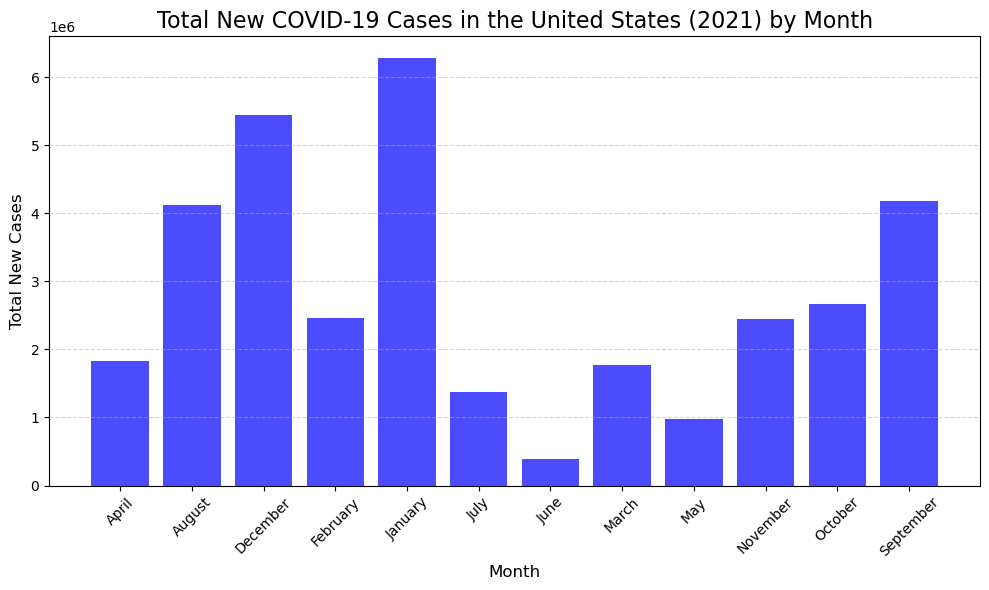

In [62]:
import matplotlib.pyplot as plt

# Cleaned USA data
usa_data = cleaned_usa_data[(cleaned_usa_data['Country'] == 'United States of America') & 
                            (cleaned_usa_data['Date_reported'].str.startswith('2021'))]

# Convert Date_reported to datetime format using .loc accessor
usa_data.loc[:, 'Date_reported'] = pd.to_datetime(usa_data['Date_reported'])

# Group data by month and calculate total new cases
monthly_data = usa_data.groupby(usa_data['Date_reported'].dt.strftime('%B'))['New_cases'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))  
plt.bar(monthly_data['Date_reported'], monthly_data['New_cases'], color='blue', alpha=0.7)
plt.title('Total New COVID-19 Cases in the United States (2021) by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total New Cases', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.tight_layout() 

plt.show()

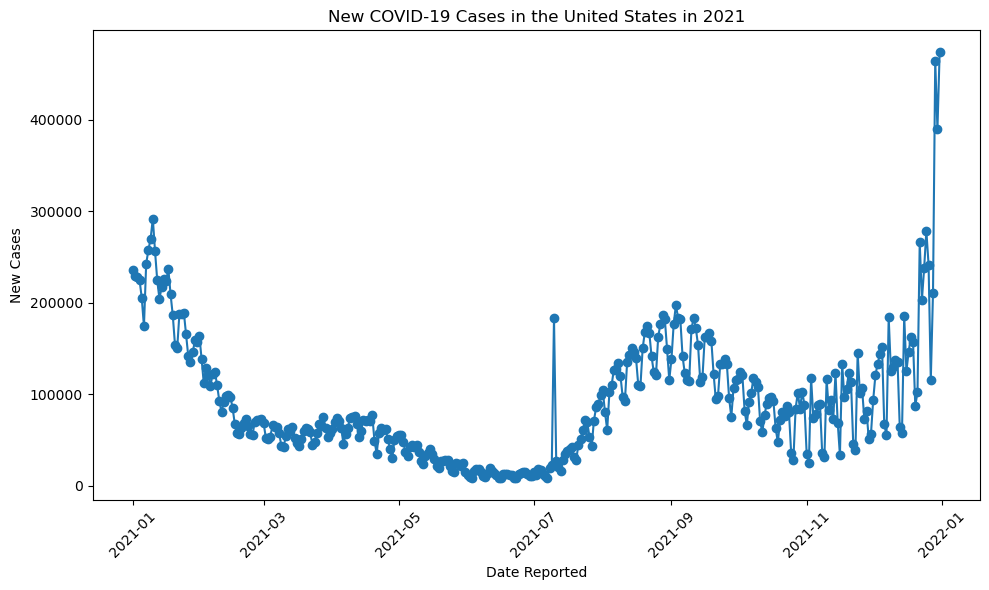

In [63]:
import matplotlib.pyplot as plt

# Create a line plot to visualize the new COVID-19 cases in the US during the year 2021

plt.figure(figsize=(10, 6))
plt.plot(usa_data['Date_reported'], usa_data['New_cases'], marker='o')
plt.xlabel('Date Reported')
plt.ylabel('New Cases')
plt.title('New COVID-19 Cases in the United States in 2021')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

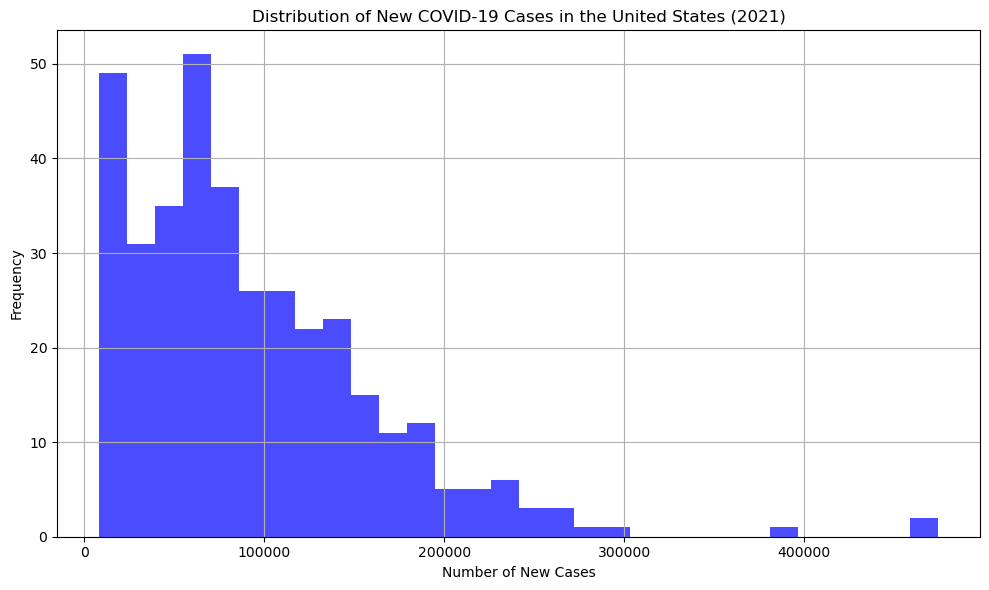

In [64]:
import matplotlib.pyplot as plt

# Extract the 'New_cases' column
new_cases = usa_data['New_cases']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(new_cases, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of New COVID-19 Cases in the United States (2021)')
plt.xlabel('Number of New Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()  
plt.show()

C:\Users\thong\AppData\Local\Temp\ipykernel_1548\3607338862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['Date_reported'] = pd.to_datetime(usa_data['Date_reported'])


<Figure size 1000x600 with 0 Axes>

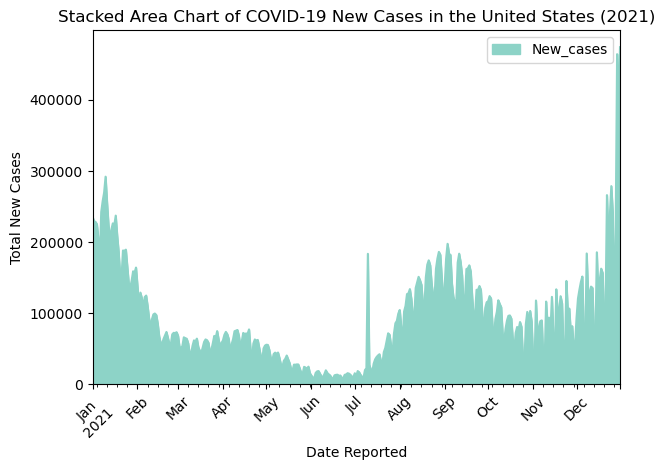

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the usa_data dataframe prepared

# Convert the 'Date_reported' column to datetime format
usa_data['Date_reported'] = pd.to_datetime(usa_data['Date_reported'])

# Create a pivot table to aggregate the new cases by date
pivot_table = usa_data.pivot_table(values='New_cases', index='Date_reported', aggfunc='sum')

# Plot the stacked area chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='area', stacked=True, colormap='Set3')
plt.title('Stacked Area Chart of COVID-19 New Cases in the United States (2021)')
plt.xlabel('Date Reported')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()